In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('topic-model-lsa-shreyawohooo.csv')
df.head()

,Text,Topic 0 score,Topic 1 score,Topic 2 score,Topic 3 score,Topic 4 score,Topic 5 score,Topic 6 score,Topic 7 score,Topic 8 score,Topic 9 score,Topic
0,Provided are methods of nucleic acid sequencin...,0.83,1.23,0.18,0.06,-0.24,-0.03,0.06,1.28,0.56,-0.14,7
1,Identifying pathways that are significantly im...,0.31,0.64,-0.45,0.39,-0.56,-0.19,-0.13,-0.04,-0.15,-0.07,1
2,"An electronic device may include: a housing, a...",13.52,-3.66,2.75,1.48,1.85,-2.08,-6.33,1.82,0.45,-0.52,0
3,Various aspects of the present disclosure gene...,3.38,0.93,-0.77,-0.50,0.78,1.01,-0.07,1.57,0.54,-0.42,0
4,A substrate bonding apparatus and a method of ...,5.28,-2.18,1.65,-0.05,-1.20,-0.86,-0.80,0.01,0.64,-0.56,0


In [4]:
df['Topic'].value_counts()

1    531347
0    500916
2    230548
7    130483
6     43495
8     34037
9     13389
3      1604
5       386
4       157
Name: Topic, dtype: int64

<Figure size 864x720 with 0 Axes>

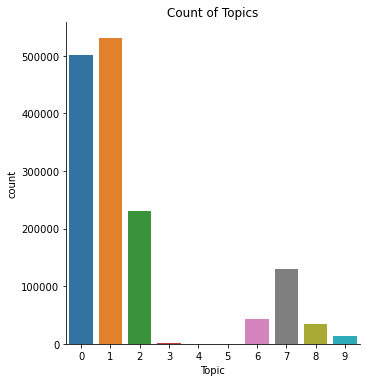

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize =(12, 10))
sns.catplot(x = "Topic", data = df, kind = "count")
plt.title('Count of Topics')
plt.show()

In [7]:
labels ={}
for i in df['Topic']:
    labels[i] = labels.get(i,0) + 1
labels

{7: 130483,
 1: 531347,
 0: 500916,
 6: 43495,
 2: 230548,
 9: 13389,
 8: 34037,
 3: 1604,
 4: 157,
 5: 386}

In [8]:
df_topics = pd.DataFrame(list(labels.items()), columns = ['Topic', 'Count'])
df_topics

,Topic,Count
0,7,130483
1,1,531347
2,0,500916
3,6,43495
4,2,230548
5,9,13389
6,8,34037
7,3,1604
8,4,157
9,5,386


In [11]:
df.iloc[:,1:11]

,Topic 0 score,Topic 1 score,Topic 2 score,Topic 3 score,Topic 4 score,Topic 5 score,Topic 6 score,Topic 7 score,Topic 8 score,Topic 9 score
0,0.83,1.23,0.18,0.06,-0.24,-0.03,0.06,1.28,0.56,-0.14
1,0.31,0.64,-0.45,0.39,-0.56,-0.19,-0.13,-0.04,-0.15,-0.07
2,13.52,-3.66,2.75,1.48,1.85,-2.08,-6.33,1.82,0.45,-0.52
3,3.38,0.93,-0.77,-0.50,0.78,1.01,-0.07,1.57,0.54,-0.42
4,5.28,-2.18,1.65,-0.05,-1.20,-0.86,-0.80,0.01,0.64,-0.56
...,...,...,...,...,...,...,...,...,...,...
1486357,1.10,0.56,1.01,-0.69,-0.80,-0.69,2.08,0.70,-1.93,0.14
1486358,2.72,3.21,1.07,-4.97,-0.23,-0.24,-1.11,-1.99,0.56,-0.85
1486359,0.72,0.54,0.80,-0.12,0.24,-1.56,-0.01,-0.19,0.11,0.72
1486360,1.46,2.40,-0.77,-0.72,0.01,-1.76,1.36,-0.85,0.28,1.02


In [13]:
X = df.iloc[:,1:11].to_numpy().tolist()
X[:5]

[[0.83, 1.23, 0.18, 0.06, -0.24, -0.03, 0.06, 1.28, 0.56, -0.14],
 [0.31, 0.64, -0.45, 0.39, -0.56, -0.19, -0.13, -0.04, -0.15, -0.07],
 [13.52, -3.66, 2.75, 1.48, 1.85, -2.08, -6.33, 1.82, 0.45, -0.52],
 [3.38, 0.93, -0.77, -0.5, 0.78, 1.01, -0.07, 1.57, 0.54, -0.42],
 [5.28, -2.18, 1.65, -0.05, -1.2, -0.86, -0.8, 0.01, 0.64, -0.56]]

In [15]:
from sklearn.manifold import TSNE

X_tsne = TSNE(n_components = 2, learning_rate='auto', init='random').fit_transform(np.array(X))

print(X_tsne)

[[ -65.62937    38.963657]
 [-126.88996    10.782635]
 [ 111.70944   -48.14905 ]
 ...
 [   8.155645   82.462555]
 [-117.04185   -16.873558]
 [-100.70305    55.949074]]


In [16]:
len(X_tsne)

1486362

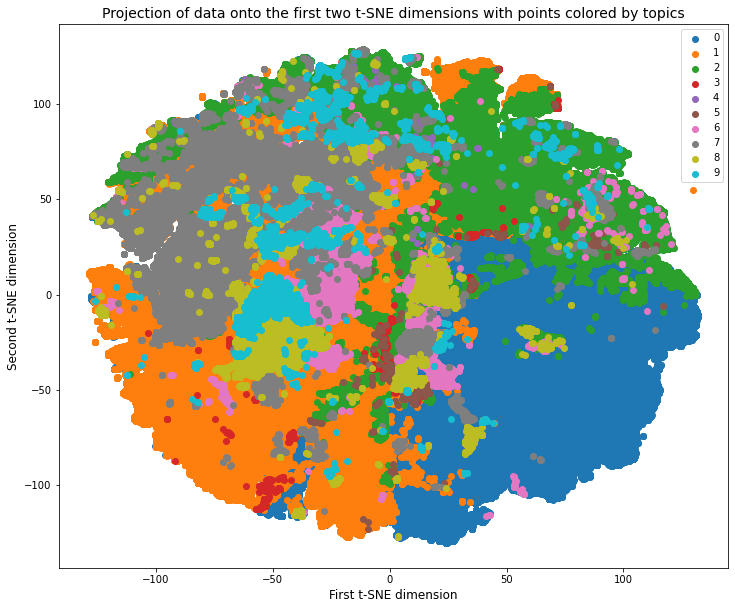

In [19]:
plt.figure(figsize=(12, 10))
for topics in np.unique(df['Topic']):
    x = X_tsne[(df['Topic'] == topics),0]
    y = X_tsne[(df['Topic'] == topics),1]
    plt.scatter(x, y, label = topics)
plt.xlabel('First t-SNE dimension', fontsize = 12)
plt.ylabel('Second t-SNE dimension', fontsize = 12)
plt.title('Projection of data onto the first two t-SNE dimensions with points colored by topics',
          fontsize = 14)
plt.legend()
plt.show()